### **GRIP OCT 2021 BATCH**

### **TASK 1: Prediction Using Supervised Learning**



## **Simple Linear** **Regression** 
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [28]:
#importing all the libraries to be used 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")

In [29]:
# Reading data from remote link
url="http://bit.ly/w-data"
data=pd.read_csv(url)


In [30]:
#Find the shape of dataset
data.shape

(25, 2)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [32]:
data["Scores"]=data["Scores"].astype("float")

In [33]:
data.dtypes

Hours     float64
Scores    float64
dtype: object

In [34]:
print("Data imported successfully")
data.head()

Data imported successfully


,Hours,Scores
0,2.5,21.0
1,5.1,47.0
2,3.2,27.0
3,8.5,75.0
4,3.5,30.0


In [35]:
#check Null values 
data.isnull().any()

Hours     False
Scores    False
dtype: bool

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

In [36]:
x=data["Hours"]
y=data["Scores"]

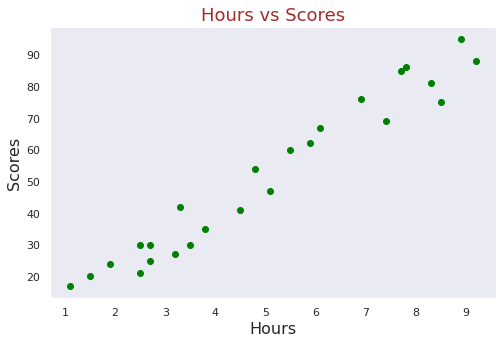

In [37]:
# Plotting the distribution of scores
plt.figure(figsize=(8,5))
sns.set(palette="magma",style="dark")
plt.scatter(x,y,color="green")
plt.xlabel("Hours",size=16)
plt.ylabel("Scores",size=16)
plt.title("Hours vs Scores",size=18,color="brown")
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

No handles with labels found to put in legend.


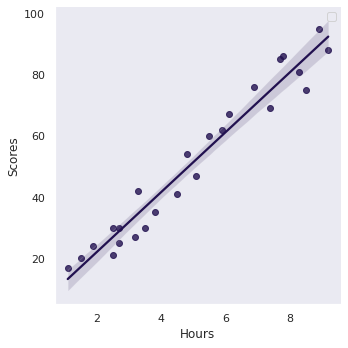

In [56]:
sns.lmplot(x="Hours",y="Scores",data=data)
plt.legend()

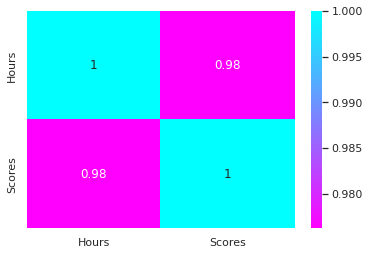

In [60]:
#correlation
corr=data.corr()
sns.heatmap(corr,cmap="cool_r",annot=True)

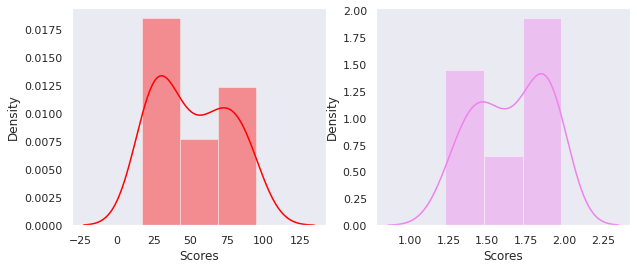

In [178]:
#analysis for scores using log
f=plt.figure(figsize=(10,4))
ax=f.add_subplot(121)
sns.distplot(data["Scores"],color="red",ax=ax)
ax=f.add_subplot(122)
sns.distplot(np.log10(data["Scores"]),color="violet",ax=ax)
plt.show()

## **Preparing the Data**

In [38]:
from sklearn.model_selection import train_test_split

In [146]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

## **Training the Algorithm**

In [148]:
from sklearn.linear_model import LinearRegression

In [160]:
lr=LinearRegression()

In [161]:
xtrain=np.array(xtrain).reshape(-1,1)
ytrain=np.array(ytrain).reshape(-1,1)

In [162]:
model=lr.fit(xtrain,ytrain)
print("Training Complete")

Training Complete


In [163]:
# Plotting the regression line
model_coef=lr.coef_
model_intercept=lr.intercept_

In [164]:
line=[model_intercept+list(model_coef)]

In [165]:
line

[array([[12.15938207]])]

In [166]:
x=np.array(x).reshape(-1,1)
y=np.array(y).reshape(-1,1)

In [167]:
xtest=np.array(xtest).reshape(-1,1)
ytest=np.array(ytest).reshape(-1,1)

In [168]:
ypred=model.predict(xtest)

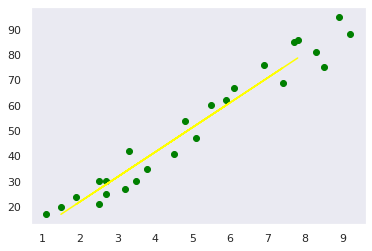

In [171]:

# Plotting for the test data
plt.scatter(x, y,color="green")
plt.plot(xtest,ypred,color="yellow");
plt.show()

## **Predicting the model**

In [172]:
ypred

array([[17.05366541],
       [33.69422878],
       [74.80620886],
       [26.8422321 ],
       [60.12335883],
       [39.56736879],
       [20.96909209],
       [78.72163554]])

In [173]:
ytest

array([[20.],
       [27.],
       [69.],
       [30.],
       [62.],
       [35.],
       [24.],
       [86.]])

In [175]:
# You can also test with your own data
hours = 9.65
own_pred = lr.predict(np.array(hours).reshape(-1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred))

No of Hours = 9.65
Predicted Score = [[96.83048391]]


## **Evaluating the model**

In [176]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(ytest, ypred)) 

Mean Absolute Error: 4.419727808027651
